<a href="https://colab.research.google.com/github/Sivaram-G97/Complete-Python-3-Bootcamp/blob/master/Bird_Migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Bird_Migration_data.xlsx')

In [ ]:
df.head(5)

,Bird_ID,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality
0,B1000,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,...,Excellent,Yes,Storm,Researcher_A,27.0,Failed,No,102,56,Low
1,B1001,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,...,Good,Yes,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low
2,B1002,Hawk,South America,Mountain,Stormy,Avoid Predators,87.861164,-78.727327,66.990980,19.448466,...,Fair,No,Lost Signal,Researcher_B,16.1,Failed,No,41,71,High
3,B1003,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,...,Good,Yes,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low
4,B1004,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,...,Good,No,NaN,Researcher_B,25.8,Failed,Yes,73,67,Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bird_ID                  10000 non-null  object 
 1   Species                  10000 non-null  object 
 2   Region                   10000 non-null  object 
 3   Habitat                  10000 non-null  object 
 4   Weather_Condition        10000 non-null  object 
 5   Migration_Reason         10000 non-null  object 
 6   Start_Latitude           10000 non-null  float64
 7   Start_Longitude          10000 non-null  float64
 8   End_Latitude             10000 non-null  float64
 9   End_Longitude            10000 non-null  float64
 10  Flight_Distance_km       10000 non-null  float64
 11  Flight_Duration_hours    10000 non-null  float64
 12  Average_Speed_kmph       10000 non-null  float64
 13  Max_Altitude_m           10000 non-null  int64  
 14  Min_Altitude_m         

In [ ]:
df.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Temperature_C,...,Pressure_hPa,Visibility_km,Tag_Battery_Level_%,Signal_Strength_dB,Rest_Stops,Predator_Sightings,Flock_Size,Tag_Weight_g,Recovery_Time_days,Observation_Counts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.321812,-0.394588,0.084391,0.467617,2504.036134,49.994020,49.953394,5504.80830,500.111800,12.566930,...,1000.440810,10.636970,54.651800,-69.8408,7.380000,4.490200,248.714500,17.605870,60.490800,49.872800
std,51.919190,104.083440,51.709437,103.438134,499.723298,10.026108,5.085296,2595.28577,229.782907,13.073405,...,28.959614,5.504623,25.839271,9.9189,4.023583,2.872826,144.943771,7.200088,34.434028,28.601997
min,-89.999003,-179.993975,-89.998482,-179.902756,527.700000,12.600000,30.430000,1000.00000,100.000000,-10.000000,...,950.000000,1.000000,10.000000,-107.9000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000
25%,-45.390697,-91.444680,-43.664719,-88.871564,2169.632500,43.200000,46.530000,3277.75000,300.000000,1.200000,...,975.000000,5.900000,32.000000,-76.6000,4.000000,2.000000,124.000000,11.400000,31.000000,25.000000
50%,-0.138849,-0.479892,-0.163116,1.280823,2511.150000,50.050000,50.040000,5521.00000,501.000000,12.500000,...,1000.950000,10.700000,55.000000,-69.8000,7.000000,5.000000,248.000000,17.700000,61.000000,50.000000
75%,44.480926,89.640253,44.957102,91.196076,2841.452500,56.800000,53.360000,7740.25000,698.000000,24.000000,...,1025.500000,15.400000,77.000000,-63.1000,11.000000,7.000000,376.000000,24.000000,91.000000,74.000000
max,89.980302,179.989973,89.989145,179.955036,4428.320000,91.000000,68.950000,9999.00000,899.000000,35.000000,...,1050.000000,20.000000,99.000000,-33.3000,14.000000,9.000000,499.000000,30.000000,119.000000,99.000000


In [ ]:
df.columns

Index(['Bird_ID', 'Species', 'Region', 'Habitat', 'Weather_Condition',
       'Migration_Reason', 'Start_Latitude', 'Start_Longitude', 'End_Latitude',
       'End_Longitude', 'Flight_Distance_km', 'Flight_Duration_hours',
       'Average_Speed_kmph', 'Max_Altitude_m', 'Min_Altitude_m',
       'Temperature_C', 'Wind_Speed_kmph', 'Humidity_%', 'Pressure_hPa',
       'Visibility_km', 'Nesting_Success', 'Tag_Battery_Level_%',
       'Signal_Strength_dB', 'Migration_Start_Month', 'Migration_End_Month',
       'Rest_Stops', 'Predator_Sightings', 'Tag_Type', 'Migrated_in_Flock',
       'Flock_Size', 'Food_Supply_Level', 'Tracking_Quality',
       'Migration_Interrupted', 'Interrupted_Reason', 'Tagged_By',
       'Tag_Weight_g', 'Migration_Success', 'Recovery_Location_Known',
       'Recovery_Time_days', 'Observation_Counts', 'Observation_Quality'],
      dtype='object')

In [ ]:
df.dtypes

,0
Bird_ID,object
Species,object
Region,object
Habitat,object
Weather_Condition,object
Migration_Reason,object
Start_Latitude,float64
Start_Longitude,float64
End_Latitude,float64
End_Longitude,float64


In [ ]:
df.isnull().sum()

,0
Bird_ID,0
Species,0
Region,0
Habitat,0
Weather_Condition,0
Migration_Reason,0
Start_Latitude,0
Start_Longitude,0
End_Latitude,0
End_Longitude,0


#Handling Missing Values

There are 1981 items missing in Interuppted reason.

In [ ]:
missing_reason_df = df[df['Interrupted_Reason'].isnull()]

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['Start_Latitude'] = df_copy['Start_Latitude'].round(1)
df_copy['Start_Longitude'] = df_copy['Start_Longitude'].round(1)

In [ ]:
df_copy['Start_Longitude'].head(10)

,Start_Longitude
0,-169.4
1,-111.5
2,-78.7
3,153.1
4,106.7
5,138.3
6,-21.4
7,116.1
8,127.3
9,-36.0


In [ ]:
len(df_copy['Start_Longitude'].unique())


3379

In [ ]:
len(df_copy['Start_Latitude'].unique())

1796

# --- Imputing missing 'Interrupted_Reason' based on group consistency ---
* We will group the bird migration data by 'Species', 'Start_Latitude', 'Start_Longitude', and 'Migration_Start_Month'. The goal is to leverage instances where at least one bird within such a specific group has a recorded 'Interrupted_Reason'.

* If we find a reason, we will propagate that same reason to all other birds in the same group with missing 'Interrupted_Reason'.

* The underlying assumption is that birds sharing these characteristics (species, starting point, and migration start time) are more likely to experience the same causes for migration interruption.

* Now first we have to check if imputation is possible i.e., we need to check if the group has atleast one non-null 'Interrupted_Reason'.



In [ ]:
grouping_cols = ['Species', 'Start_Latitude', 'Start_Longitude', 'Migration_Start_Month']
reason_col = 'Interrupted_Reason'

grouped = df_copy.groupby(grouping_cols)

In [ ]:
def can_impute_simple(group):
    has_non_null = group[reason_col].notna().any()
    has_null = group[reason_col].isnull().any()
    return has_non_null and has_null

In [ ]:
imputation_possible = grouped.apply(can_impute_simple).any()


<ipython-input-20-da5ea8e9b1f0>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  imputation_possible = grouped.apply(can_impute_simple).any()


In [ ]:
print(imputation_possible)

False


Now it's evident that imputation isn't possible

# Univariate Analysis

Text(0.5, 1.0, 'Distribution of Flight Distances')

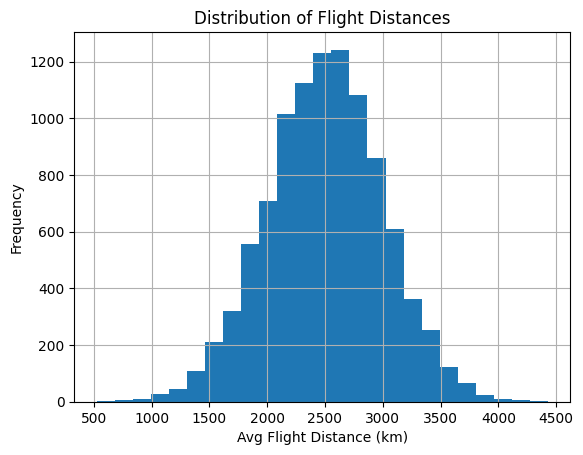

In [ ]:
df['Flight_Distance_km'].hist(bins=25)
plt.xlabel('Avg Flight Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Distances')

Text(0.5, 1.0, 'Distribution of Flight hours')

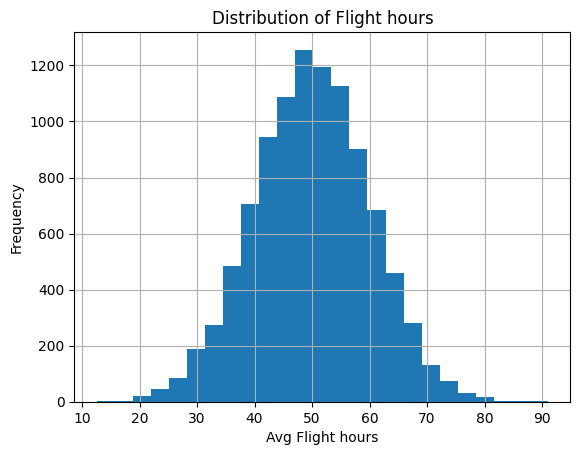

In [ ]:
df['Flight_Duration_hours'].hist(bins=25)
plt.xlabel('Avg Flight hours')
plt.ylabel('Frequency')
plt.title('Distribution of Flight hours')

Text(0.5, 1.0, 'Distribution of Average Speed')

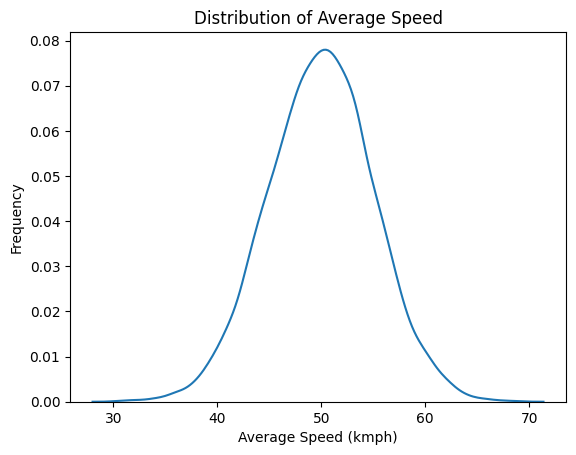

In [ ]:
sns.kdeplot(df['Average_Speed_kmph'])
plt.xlabel('Average Speed (kmph)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Speed')

In [46]:
altitude_data = df[['Max_Altitude_m', 'Min_Altitude_m']].melt(var_name = 'Altitude_Type', value_name = 'Altitude')

Text(0.5, 1.0, 'Distribution of Altitude')

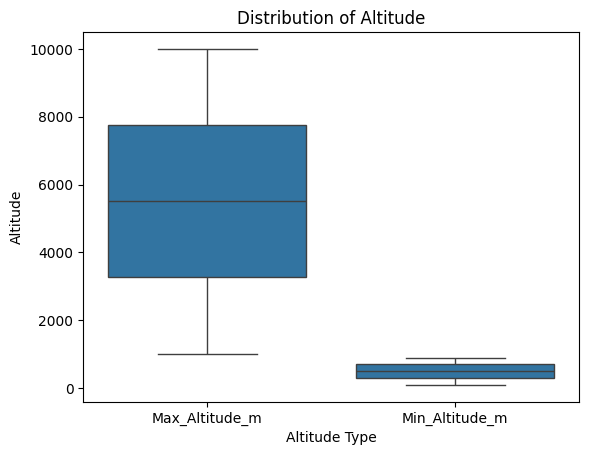

In [47]:
sns.boxplot(x = 'Altitude_Type', y = 'Altitude', data = altitude_data)
plt.xlabel('Altitude Type')
plt.ylabel('Altitude')
plt.title('Distribution of Altitude')

Text(0.5, 1.0, 'Distribution of Temperature')

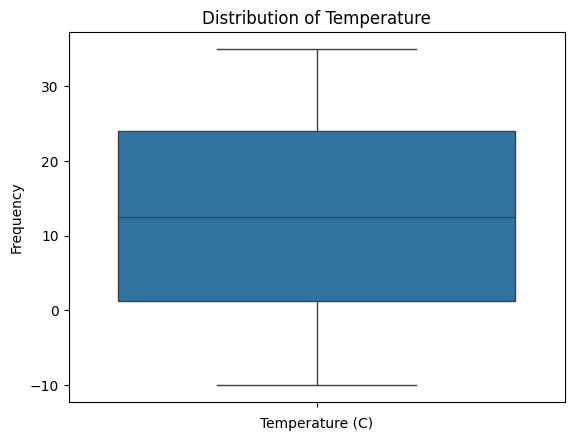

In [55]:
sns.boxplot(df['Temperature_C'])
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

Text(0.5, 1.0, 'Distribution of Wind Speed')

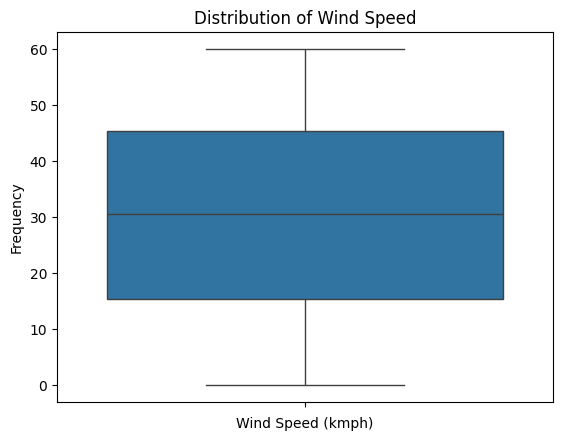

In [56]:
sns.boxplot(df['Wind_Speed_kmph'])
plt.xlabel('Wind Speed (kmph)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')

In [53]:
df.columns

Index(['Bird_ID', 'Species', 'Region', 'Habitat', 'Weather_Condition',
       'Migration_Reason', 'Start_Latitude', 'Start_Longitude', 'End_Latitude',
       'End_Longitude', 'Flight_Distance_km', 'Flight_Duration_hours',
       'Average_Speed_kmph', 'Max_Altitude_m', 'Min_Altitude_m',
       'Temperature_C', 'Wind_Speed_kmph', 'Humidity_%', 'Pressure_hPa',
       'Visibility_km', 'Nesting_Success', 'Tag_Battery_Level_%',
       'Signal_Strength_dB', 'Migration_Start_Month', 'Migration_End_Month',
       'Rest_Stops', 'Predator_Sightings', 'Tag_Type', 'Migrated_in_Flock',
       'Flock_Size', 'Food_Supply_Level', 'Tracking_Quality',
       'Migration_Interrupted', 'Interrupted_Reason', 'Tagged_By',
       'Tag_Weight_g', 'Migration_Success', 'Recovery_Location_Known',
       'Recovery_Time_days', 'Observation_Counts', 'Observation_Quality'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Humidity')

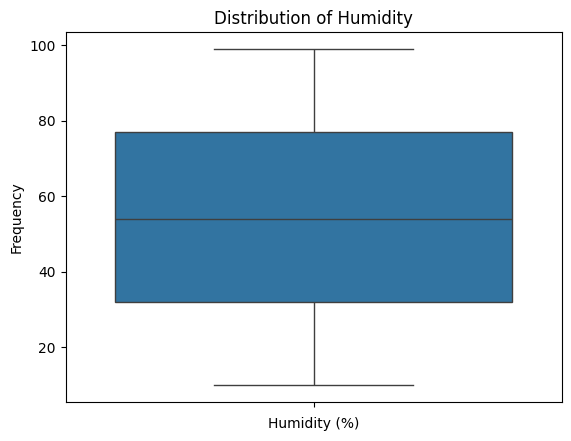

In [57]:
sns.boxplot(df['Humidity_%'])
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')

Text(0.5, 1.0, 'Distribution of Pressure')

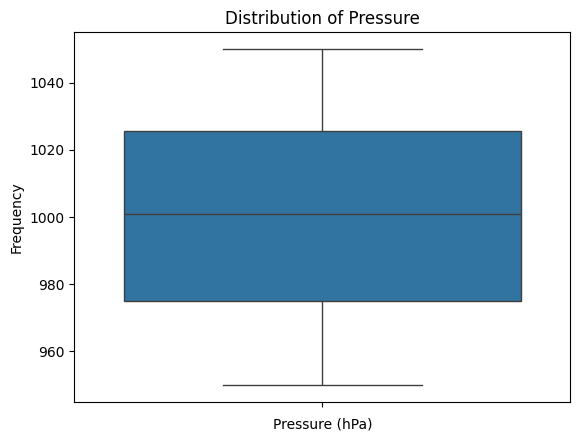

In [62]:
sns.boxplot(df['Pressure_hPa'])
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Pressure')